In [1]:
import kan
import kan.utils as ku
import torch
import torch.nn as nn
import numpy as np
from libraries import utils
from libraries import magnetization as mag
from libraries import j1j2_functions
import numpy.random as npr
import qutip as qt
import sympy
import random

In [2]:
N=8; J1=0; J2=1 # 0 mod 4 case

In [3]:
h8 = j1j2_functions.J1J2_hamiltonian(N, J1, J2)
eigs8 = h8.eigenstates()
gs8 = eigs8[1][0]

In [4]:
states8, signs8 = utils.get_nonzero_states(N, gs8, 1e-10)
print(len(states8))

36


In [ ]:
for i in states8:
    if mag.count_half_magnetization(i) != N//2:
        print(i, bin(i))

In [6]:
bin_input = utils.generate_input_samples(N, states8)
sign_labels = torch.tensor(signs8, dtype=torch.float32).reshape(-1, 1)
print(bin_input.shape, sign_labels.shape)

torch.Size([36, 8]) torch.Size([36, 1])


In [7]:
msr_pred = torch.tensor([mag.count_half_magnetization(i) for i in states8], dtype=torch.float32).reshape(-1, 1)
print(sum((msr_pred - sign_labels) ** 2))
print(sum((msr_pred + sign_labels) ** 2))
# not very good MSR prediction

tensor([196.])
tensor([164.])


In [10]:
k8 = kan.KAN(width=[N, N, 1])
dataset8 = {'train_input':bin_input, 'train_label':sign_labels, 'test_input':bin_input, 'test_label':sign_labels}
k8(bin_input)
k8.fit(dataset8, steps=20, lamb=1e-2);

checkpoint directory created: ./model
saving model version 0.0


| train_loss: 2.32e-02 | test_loss: 2.32e-02 | reg: 1.03e+01 | : 100%|█| 20/20 [00:03<00:00,  6.46it

saving model version 0.1


In [11]:
k8.prune().width

saving model version 0.2


[[8, 0], [2, 0], [1, 0]]

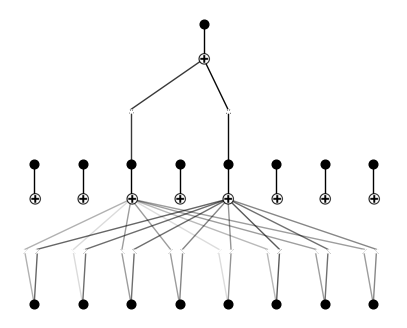

In [12]:
k8.plot()

In [13]:
k8 = k8.prune()
k8.fit(dataset8, lamb=1e-3);

saving model version 0.2


| train_loss: 1.61e-03 | test_loss: 1.61e-03 | reg: 8.50e+00 | : 100%|█| 100/100 [00:08<00:00, 11.91

saving model version 0.3


In [14]:
k8.prune().width

saving model version 0.4


[[8, 0], [1, 0], [1, 0]]

In [15]:
k8 = k8.prune()
k8.fit(dataset8, lamb=1e-3, steps=20);

saving model version 0.4


| train_loss: 7.01e-04 | test_loss: 7.01e-04 | reg: 9.31e+00 | : 100%|█| 20/20 [00:02<00:00,  7.94it

saving model version 0.5


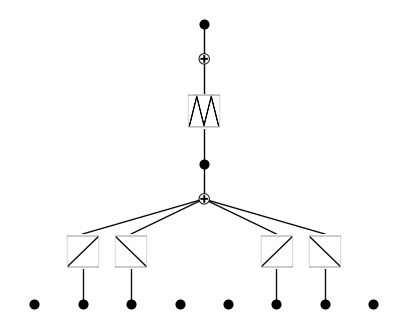

In [16]:
k8.plot()

   function  fitting r2    r2 loss  complexity  complexity loss  total loss
0       cos    1.000000 -16.609640           2                2  -11.026748
1       sin    1.000000 -16.592544           2                2  -11.014781
2       tan    0.999981 -15.090790           3                3   -9.663553
3     1/x^2    0.798605  -2.311826           2                2   -1.018278
4       1/x    0.798551  -2.311439           2                2   -1.018008
5     1/x^3    0.812756  -2.416929           3                3   -0.791850
6  gaussian    0.800019  -2.321993           3                3   -0.725395
7     1/x^4    0.799488  -2.318165           4                4   -0.422715
8     1/x^5    0.819116  -2.466783           5                5   -0.226748
9         0    0.000000   0.000014           0                0    0.000010


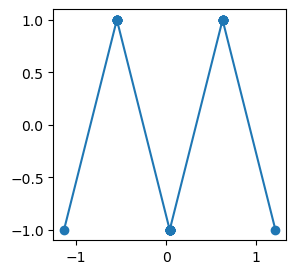

In [17]:
k8.get_fun(1, 0, 0);
k8.suggest_symbolic(1, 0, 0, topk=10, weight_simple=0.3);

In [18]:
k8.auto_symbolic(weight_simple=0.3, r2_threshold=0.95);

fixing (0,0,0) with 0
fixing (0,1,0) with x, r2=1.0000005960464478, c=1
fixing (0,2,0) with x, r2=1.0000004768371582, c=1
fixing (0,3,0) with exp, r2=1.0000004768371582, c=2
fixing (0,4,0) with 0
fixing (0,5,0) with x, r2=1.0000003576278687, c=1
fixing (0,6,0) with x, r2=1.0000005960464478, c=1
fixing (0,7,0) with exp, r2=1.0000007152557373, c=2
fixing (1,0,0) with cos, r2=1.0, c=2
saving model version 0.6


In [19]:
k8.fit(dataset8, steps=20);

| train_loss: 4.01e-04 | test_loss: 4.01e-04 | reg: 0.00e+00 | : 100%|█| 20/20 [00:00<00:00, 29.87it

saving model version 0.7


In [22]:
ku.ex_round(k8.symbolic_formula()[0][0], 3)

-1.001*cos(3.151*x_2 - 3.149*x_3 + 3.149*x_6 - 3.152*x_7 + 0.042)

In [24]:
u8 = utils.find_uniques(states8, N)
print(u8)
for x in u8:
    print(bin(x))

{15: 8, 27: 8, 39: 8, 45: 8, 51: 4}
0b1111
0b11011
0b100111
0b101101
0b110011


In [75]:
N=10
h10 = j1j2_functions.J1J2_hamiltonian(N, J1, J2)
eigs10 = h10.eigenstates()
gs10 = eigs10[1][0]

In [76]:
gs10

Quantum object: dims=[[2, 2, 2, 2, 2, 2, 2, 2, 2, 2], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]], shape=(1024, 1), type='ket', dtype=Dense
Qobj data =
[[ 0.00000000e+00]
 [ 1.46791582e-49]
 [-1.76804111e-17]
 ...
 [ 1.45818689e-49]
 [-1.94047169e-49]
 [ 0.00000000e+00]]

In [77]:
states10, signs10 = utils.get_nonzero_states(N, gs10, 1e-10)
devs = []
for i in states10:
    if mag.count_magnetization(i) != N//2:
        devs.append(i)
        print(i, bin(i))
print(len(devs))
# it seems that N=8 satisfies this but N=10 doesn't??
# half the states have either 4 or 6 spins??
bin_input = utils.generate_input_samples(N, states10)
sign_labels = torch.tensor(signs10, dtype=torch.float32).reshape(-1, 1)
print(bin_input.shape, sign_labels.shape)

15 0b1111
27 0b11011
30 0b11110
39 0b100111
45 0b101101
51 0b110011
54 0b110110
57 0b111001
60 0b111100
63 0b111111
75 0b1001011
78 0b1001110
90 0b1011010
99 0b1100011
102 0b1100110
105 0b1101001
108 0b1101100
111 0b1101111
114 0b1110010
120 0b1111000
123 0b1111011
126 0b1111110
135 0b10000111
141 0b10001101
147 0b10010011
150 0b10010110
153 0b10011001
156 0b10011100
159 0b10011111
165 0b10100101
177 0b10110001
180 0b10110100
183 0b10110111
189 0b10111101
195 0b11000011
198 0b11000110
201 0b11001001
204 0b11001100
207 0b11001111
210 0b11010010
216 0b11011000
219 0b11011011
222 0b11011110
225 0b11100001
228 0b11100100
231 0b11100111
237 0b11101101
240 0b11110000
243 0b11110011
246 0b11110110
249 0b11111001
252 0b11111100
267 0b100001011
270 0b100001110
282 0b100011010
291 0b100100011
294 0b100100110
297 0b100101001
300 0b100101100
303 0b100101111
306 0b100110010
312 0b100111000
315 0b100111011
318 0b100111110
330 0b101001010
354 0b101100010
360 0b101101000
363 0b101101011
366 0b10110111

In [85]:
u10 = utils.find_uniques(states10, 10)
print(u10)
for x in u10:
    print(bin(x))

{15: 10, 27: 10, 31: 10, 39: 10, 45: 10, 47: 10, 51: 10, 55: 10, 57: 10, 59: 10, 61: 10, 63: 10, 75: 10, 79: 10, 91: 10, 99: 5, 103: 10, 105: 10, 107: 10, 109: 10, 111: 10, 115: 10, 121: 10, 123: 10, 147: 10, 151: 10, 155: 10, 157: 10, 159: 10, 165: 5, 167: 10, 173: 10, 179: 10, 181: 10, 183: 10, 189: 10, 205: 10, 207: 10, 219: 10, 231: 5, 237: 10, 363: 5}
0b1111
0b11011
0b11111
0b100111
0b101101
0b101111
0b110011
0b110111
0b111001
0b111011
0b111101
0b111111
0b1001011
0b1001111
0b1011011
0b1100011
0b1100111
0b1101001
0b1101011
0b1101101
0b1101111
0b1110011
0b1111001
0b1111011
0b10010011
0b10010111
0b10011011
0b10011101
0b10011111
0b10100101
0b10100111
0b10101101
0b10110011
0b10110101
0b10110111
0b10111101
0b11001101
0b11001111
0b11011011
0b11100111
0b11101101
0b101101011


In [ ]:
def man10()

In [45]:
k10 = kan.KAN(width=[N, N, N, 1])
dataset10 = {'train_input':bin_input, 'train_label':sign_labels, 'test_input':bin_input, 'test_label':sign_labels}
k10(bin_input)
k10.fit(dataset10, steps=20, lamb=0);

checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.03e-01 | test_loss: 1.03e-01 | reg: 6.59e+01 | : 100%|█| 20/20 [00:07<00:00,  2.52it

saving model version 0.1


In [78]:
N=12
#h12 = j1j2_functions.J1J2_hamiltonian(N, J1, J2)
#eigs12 = h12.eigenstates()
#gs12 = eigs12[1][0]
#qt.qsave(gs12, f'n{N}gs_J2_inf')
gs12 = qt.qload('n12gs_j2_inf')

In [79]:
states12, signs12 = utils.get_nonzero_states(N, gs12, 1e-10)
devs = []
for i in states12:
    if mag.count_magnetization(i) != N//2:
        devs.append(i)
        print(i, bin(i))
print(len(devs))
bin_input = utils.generate_input_samples(N, states12)
sign_labels = torch.tensor(signs12, dtype=torch.float32).reshape(-1, 1)
print(bin_input.shape, sign_labels.shape)

0
torch.Size([400, 12]) torch.Size([400, 1])


In [67]:
torch.manual_seed(2)
k12 = kan.KAN(width=[N, N, 1])
dataset12 = {'train_input':bin_input, 'train_label':sign_labels, 'test_input':bin_input, 'test_label':sign_labels}
# k12(bin_input)
k12.fit(dataset12, steps=20, lamb=1e-3);

checkpoint directory created: ./model
saving model version 0.0


| train_loss: 3.59e-02 | test_loss: 3.59e-02 | reg: 5.05e+01 | : 100%|█| 20/20 [00:07<00:00,  2.59it

saving model version 0.1


In [68]:
k12.prune().width

saving model version 0.2


[[12, 0], [9, 0], [1, 0]]

In [69]:
k12 = k12.prune()
k12.fit(dataset12, steps=20, lamb=1e-3);

saving model version 0.2


| train_loss: nan | test_loss: nan | reg: nan | :  25%|███▌          | 5/20 [00:01<00:05,  2.61it/s]

lstsq failed


UnboundLocalError: cannot access local variable 'coef' where it is not associated with a value

In [80]:
bin_input

tensor([[1., 1., 1.,  ..., 0., 0., 0.],
        [1., 1., 1.,  ..., 0., 0., 0.],
        [1., 1., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 1.,  ..., 1., 1., 1.],
        [0., 0., 0.,  ..., 1., 1., 1.],
        [0., 0., 0.,  ..., 1., 1., 1.]])

In [86]:
def manual_sr(x, N, shift=0):
    return sum(x[:, (i + shift) % N] + x[:, (i + 1 + shift) % N] for i in range(0, N, 4))

In [87]:
(torch.cos(torch.pi * manual_sr(bin_input, N)) - sign_labels).mean()

tensor(0.)

In [88]:
for shift in range(4):
    print((torch.cos(torch.pi * manual_sr(bin_input, N, shift=shift)) - sign_labels).mean())

tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)


In [89]:
j1j2_functions.J1J2_hamiltonian(3, 1, 0).eigenstates()

(array([-3., -3., -3., -3.,  3.,  3.,  3.,  3.]),
 array([Quantum object: dims=[[2, 2, 2], [1, 1, 1]], shape=(8, 1), type='ket', dtype=Dense
        Qobj data =
        [[ 0.        ]
         [ 0.        ]
         [ 0.70710678]
         [ 0.        ]
         [-0.70710678]
         [ 0.        ]
         [ 0.        ]
         [ 0.        ]]                                                                   ,
        Quantum object: dims=[[2, 2, 2], [1, 1, 1]], shape=(8, 1), type='ket', dtype=Dense
        Qobj data =
        [[ 0.        ]
         [ 0.        ]
         [ 0.        ]
         [ 0.        ]
         [ 0.        ]
         [-0.70710678]
         [ 0.70710678]
         [ 0.        ]]                                                                   ,
        Quantum object: dims=[[2, 2, 2], [1, 1, 1]], shape=(8, 1), type='ket', dtype=Dense
        Qobj data =
        [[ 0.        ]
         [ 0.        ]
         [ 0.        ]
         [-0.81649658]
         [ 0.      